<p><h1>Лабораторная работа 1 Вариант 13</h1></p>
<p><h1>Петров Платон Дмитриевич</h1></p>

--------

<h2>Задание 1</h2>

----

In [6]:
import functools
import random
import timeit
import typing
import numpy as np
import matplotlib.pyplot as plt

vec = [random.randint(1, 1000) for _ in range(0, 7 * (10 ** 5))]


def get_usage_time(
        *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator




<h3>Постоянная функция $f_1(v) = N$ <h3>

In [7]:
def task1(vec: list[int]) -> int:
    return vec[0]

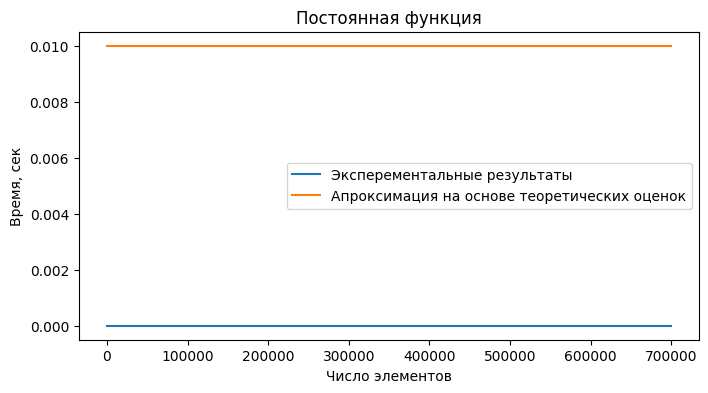

In [46]:
func = get_usage_time(ndigits=5, number=5)(task1)

items = [i for i in range(1, len(vec), 700)]
times = [func(vec[:i]) for i in items]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

ax.plot(items, times, label='Эксперементальные результаты')
ax.plot(items, [0.01  for i in items], label='Апроксимация на основе теоретических оценок')
ax.legend()
plt.title('Постоянная функция')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()



---

<h3>Вычисление полинома методом Горнера $f_4(v) = v_1 + x (v_2 + x(v_3+ \ldots)),$     $x = 10.5$ <h3>

In [25]:
def task2(vec: list[int], x=1.5 * 7):
    result = vec[-1]

    for i in range(len(vec) - 2, -1, -1):
        result = result * x + vec[i]

    return result

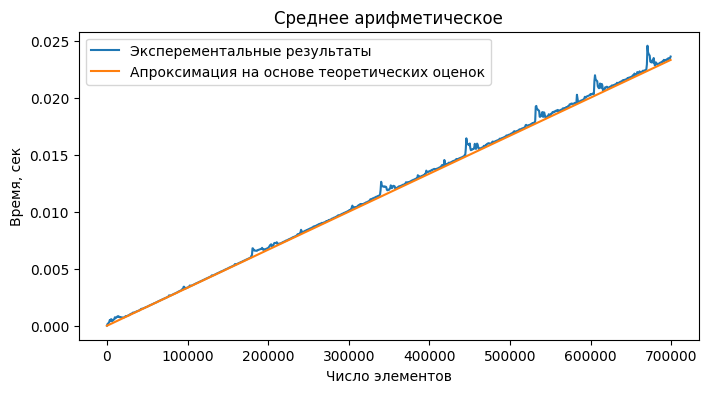

In [53]:
func = get_usage_time(ndigits=5, number=5)(task2)

items = [i for i in range(1, len(vec), 700)]
times = [func(vec[:i]) for i in items]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

ax.plot(items, times, label='Эксперементальные результаты')
ax.plot(items, [i /30009000  for i in items], label='Апроксимация на основе теоретических оценок')
ax.legend()
plt.title('Среднее арифметическое')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()



----

<h3>Поиск минимума простым перебором $f_6(v) = \min(v)$ <h3>

In [31]:
def task3(vec: list[int]) -> int:
    min = vec[0]
    for num in vec:
        if num < min:
            min = num
    return min

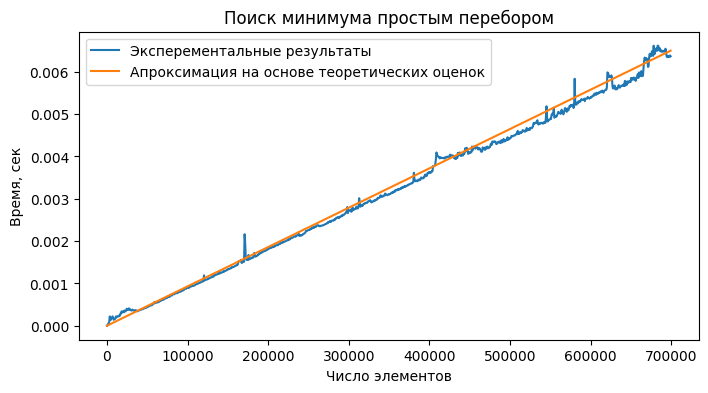

In [33]:
func = get_usage_time(ndigits=5, number=5)(task3)

items = [i for i in range(1, len(vec), 700)]
times = [func(vec[:i]) for i in items]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

ax.plot(items, times, label='Эксперементальные результаты')
ax.plot(items, [i /107692000  for i in items], label='Апроксимация на основе теоретических оценок')
ax.legend()
plt.title('Поиск минимума простым перебором')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()


---

<h3>Среднее арифметическое $f_7(v) = \cfrac{1}{n} \cdot \sum\limits_{k=1}^{n} {v_k}$ <h3>

In [4]:
def task4(vec: list[int]):
    return sum(vec) / len(vec)

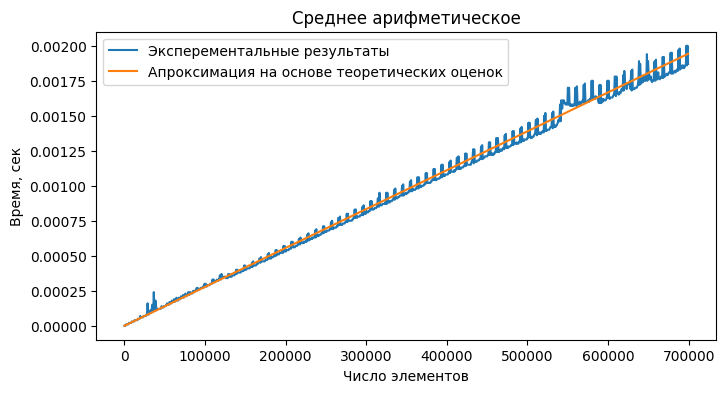

In [51]:
func = get_usage_time(ndigits=5, number=5)(task4)

items = [i for i in range(1, len(vec), 700)]
times = [func(vec[:i]) for i in items]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

ax.plot(items, times, label='Эксперементальные результаты')
ax.plot(items, [(i) / 360000000 for i in items], label='Апроксимация на основе теоретических оценок')
ax.legend()
plt.title('Среднее арифметическое')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()



---

<h2>Задание 2</h2>

<h3>Умножение матриц</h3>

In [27]:
def matrix_multiply(a, b):
    return np.dot(a,b)

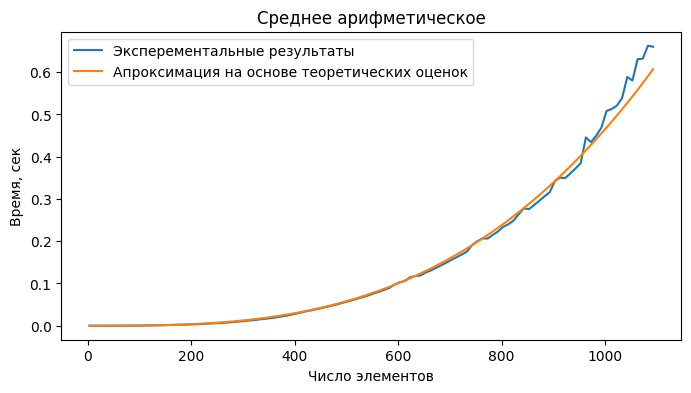

In [54]:
func = get_usage_time(ndigits=5, number=5)(matrix_multiply)
a = np.array([[random.randint(1, 1000) for _ in range(1100)]for _ in range(1100)])
b = np.array([[random.randint(1, 1000) for _ in range(1100)]for _ in range(1100)])

items = [i for i in range(3, 1100, 10)]
times = [func(a[:i, :i], b[:i,:i]) for i in range(3, 1100, 10)]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.plot(items , times, label='Эксперементальные результаты')
ax.plot(items, [(i**3) / 2151151111 for i in items], label='Апроксимация на основе теоретических оценок')
ax.legend()
plt.title('Среднее арифметическое')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()